##**Understanding the dataset**

The data provided is text data that has 6 columns with 404290 rows.

Below are the variables in our dataset:

•	id - the id of a training set question pair

•	qid1, qid2 - unique ids of each question (only available in train.csv)

•	question1, question2 - the full text of each question

•	is_duplicate - the target variable, set to 1 if question1 and question2 have essentially the same meaning, and 0 otherwise.


In [ ]:
# Import Libraries

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
colors = ['firebrick', 'tomato']

In [ ]:
# Load data

url = 'https://github.com/Koorimikiran369/Quora-Question-Pairing/raw/main/train.csv.zip'

df = pd.read_csv(url, compression='zip')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
print("Shape of the data: ", df.shape)

Shape of the data:  (404290, 6)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
# Check null values

df.isna().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
# Print null values

nan = df[df.isna().any(1)]
print(nan)

            id    qid1    qid2                         question1  \
105780  105780  174363  174364    How can I develop android app?   
201841  201841  303951  174364  How can I create an Android app?   
363362  363362  493340  493341                               NaN   

                                                question2  is_duplicate  
105780                                                NaN             0  
201841                                                NaN             0  
363362  My Chinese name is Haichao Yu. What English na...             0  


<ipython-input-6-51bdd7df9bba>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  nan = df[df.isna().any(1)]


qid2 has 2 null rows with the same qid

In [ ]:
# Drop rows with null values

df.dropna(inplace=True)
df.shape

(404287, 6)

In [ ]:
# Check duplicate values
 
df.duplicated().sum()

0

**Target Variable**

In [ ]:
# Target variable distribution

df['is_duplicate'].value_counts()

0    255024
1    149263
Name: is_duplicate, dtype: int64

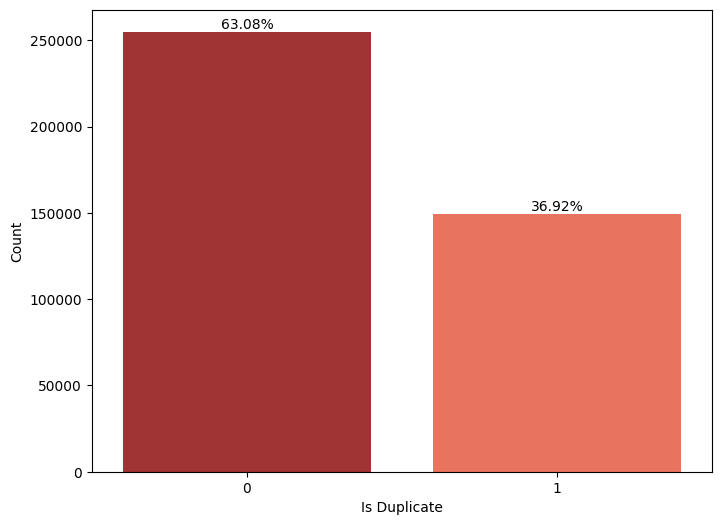

In [ ]:
# Visualizing the target distribution

plt.figure(figsize=(8, 6))
sns.countplot(x='is_duplicate', data=df, palette=colors)
plt.xlabel('Is Duplicate')
plt.ylabel('Count')

# Calculate the percentage for each category
total_count = len(df)
counts = df['is_duplicate'].value_counts()
for i, count in enumerate(counts):
    percentage = (count / total_count) * 100
    plt.text(i, count, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

The target distribution is imbalanced